In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [4]:
DATASET_ID = 'batsong_segmented'

In [5]:
datasets = list((DATA_DIR / 'embeddings' / DATASET_ID / 'indvs').glob('*.pickle'))
datasets = pd.DataFrame([[i.parent.stem, i.stem, i] for i in datasets], columns = ['ds', 'indv', '_loc'])

In [6]:
datasets[:3]

ds indv                                               _loc
0  indvs  215  /mnt/cube/tsainbur/Projects/github_repos/avgn_...
1  indvs  203  /mnt/cube/tsainbur/Projects/github_repos/avgn_...
2  indvs  116  /mnt/cube/tsainbur/Projects/github_repos/avgn_...

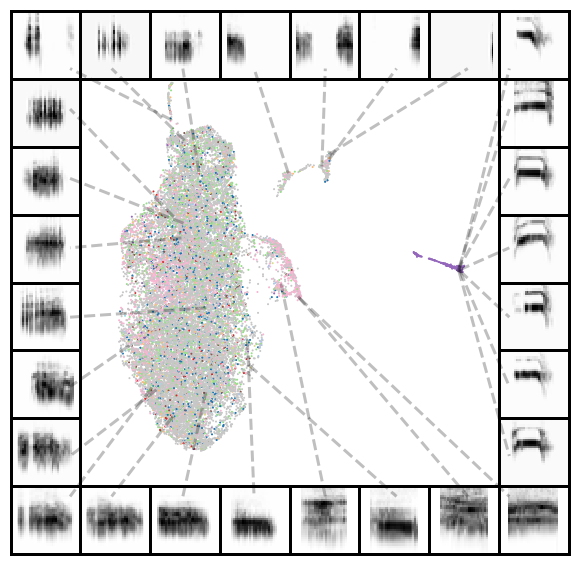

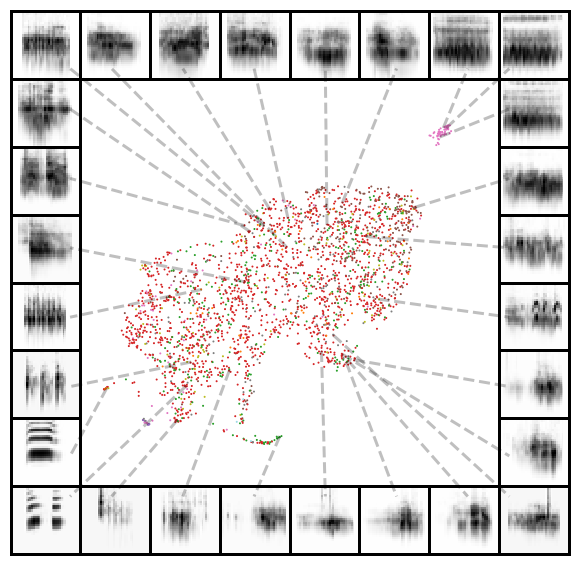

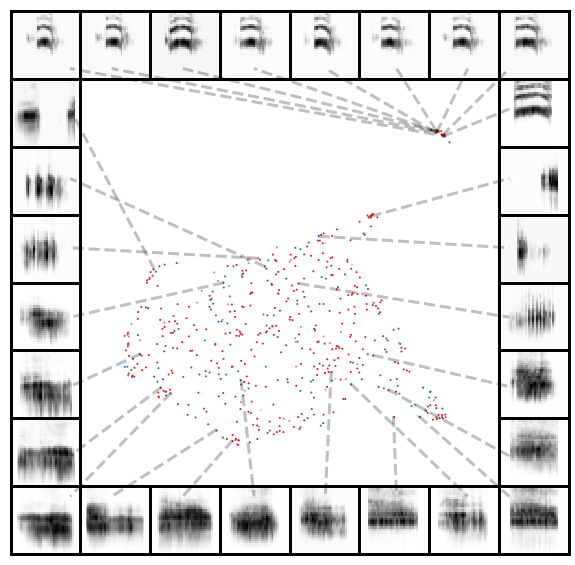

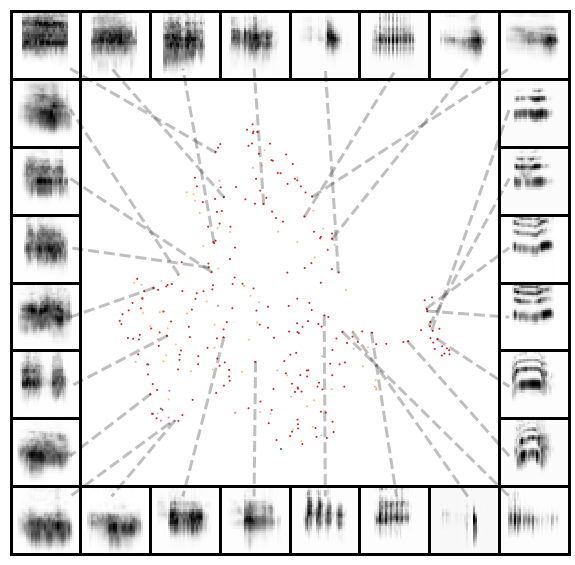

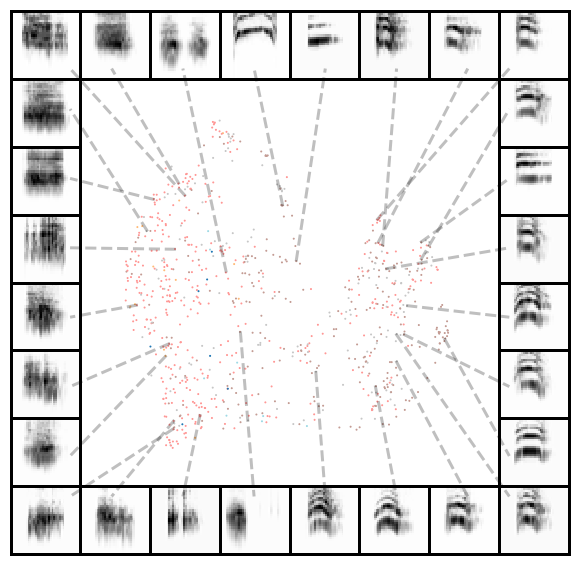

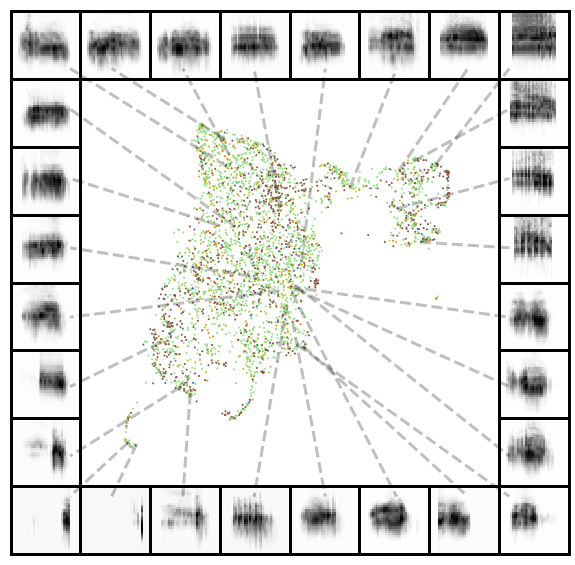

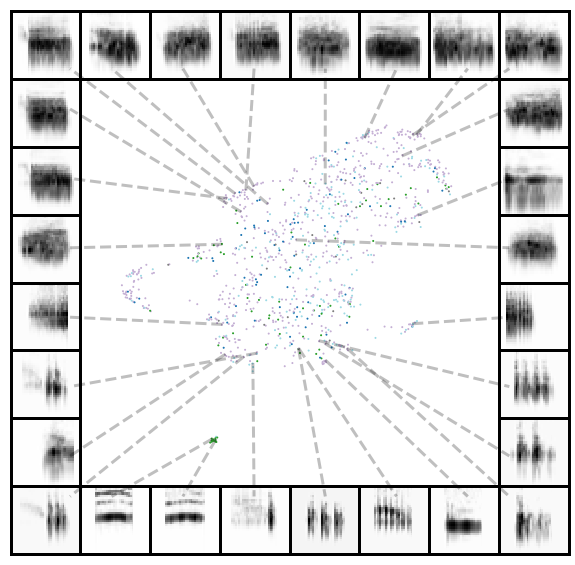

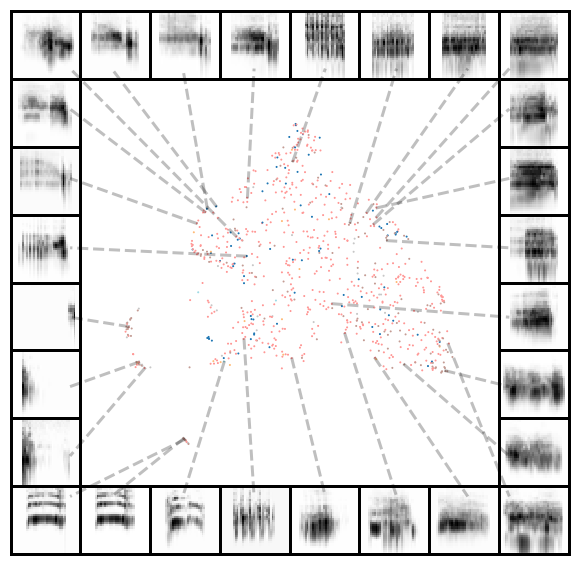

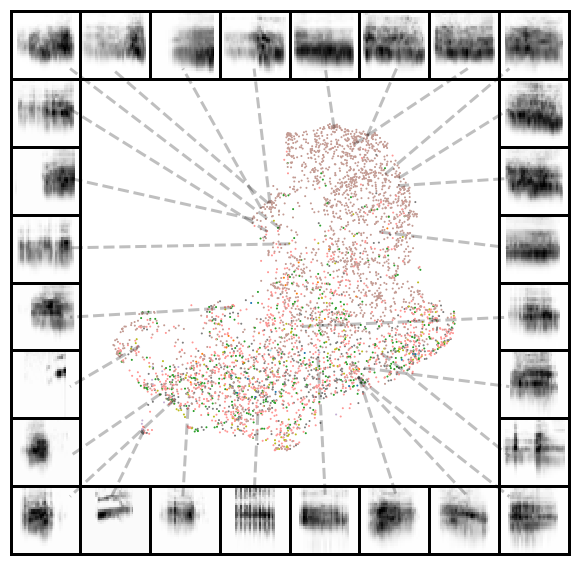

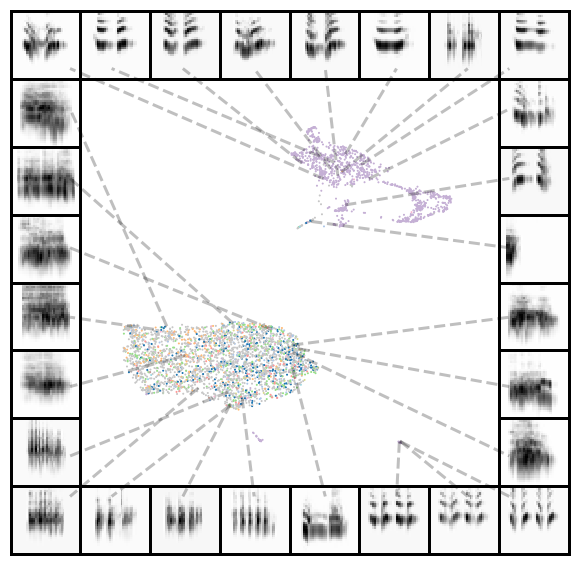

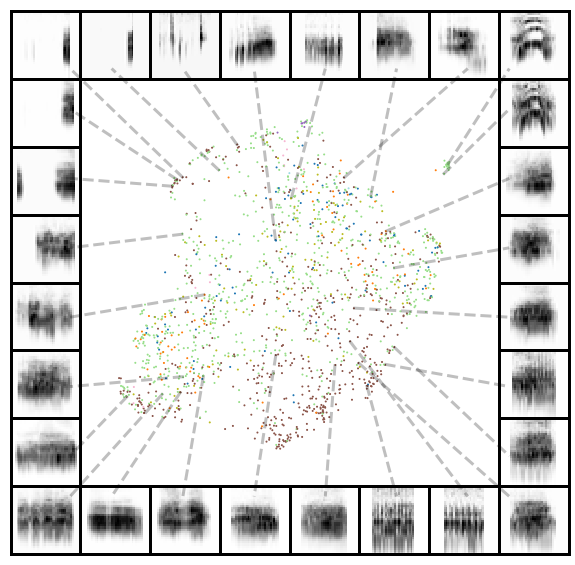

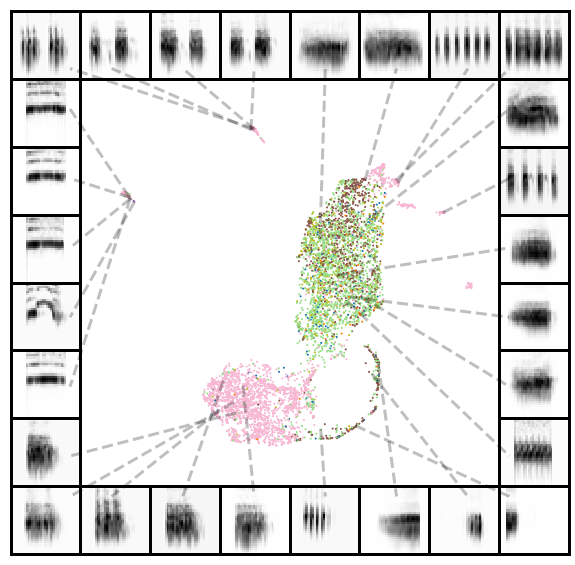

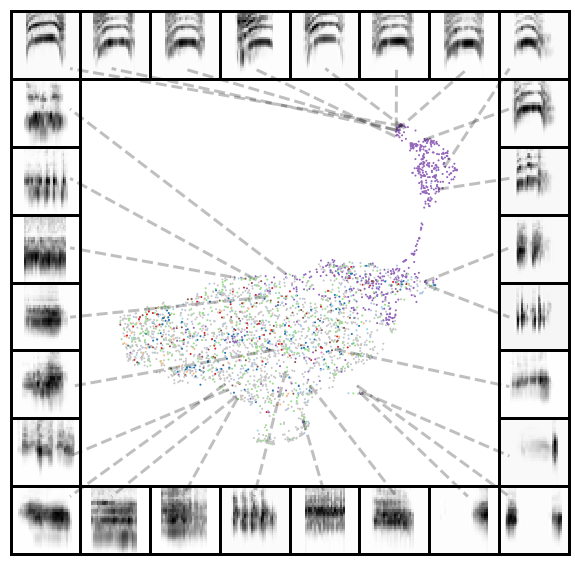

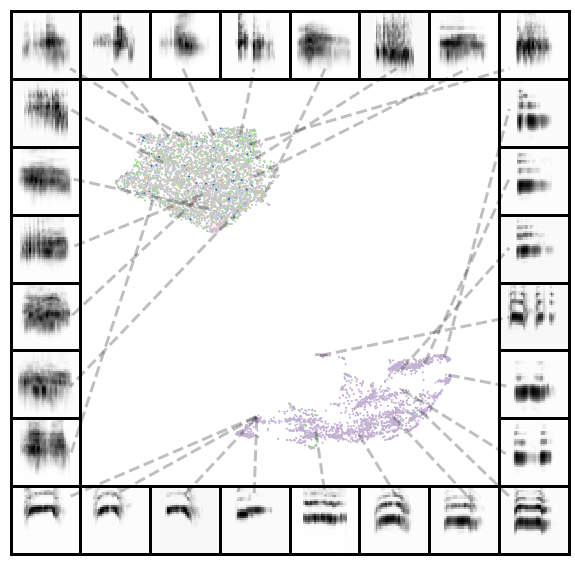

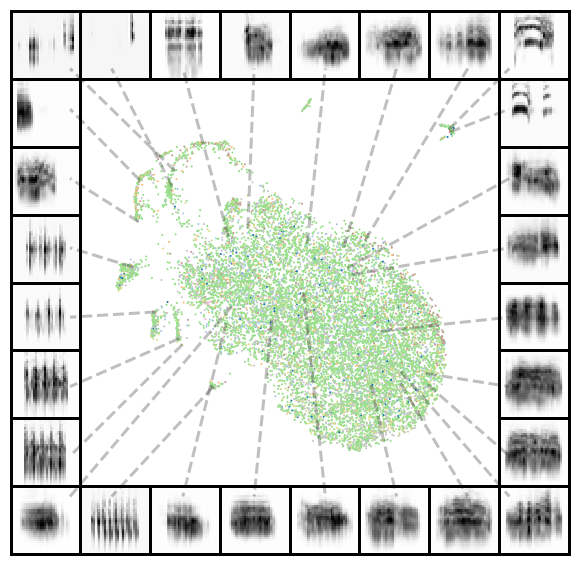

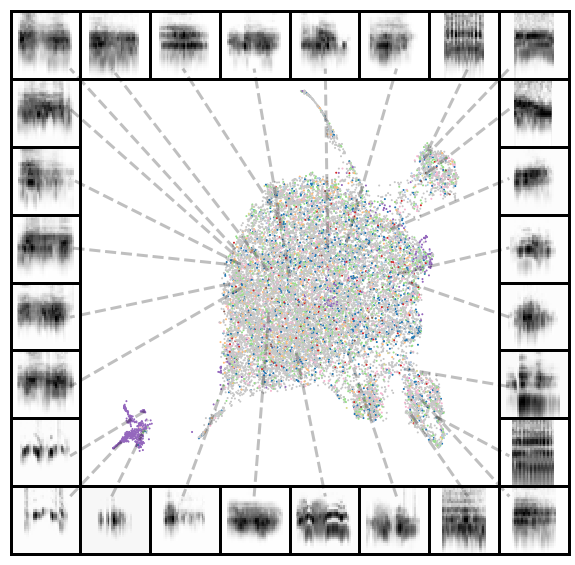

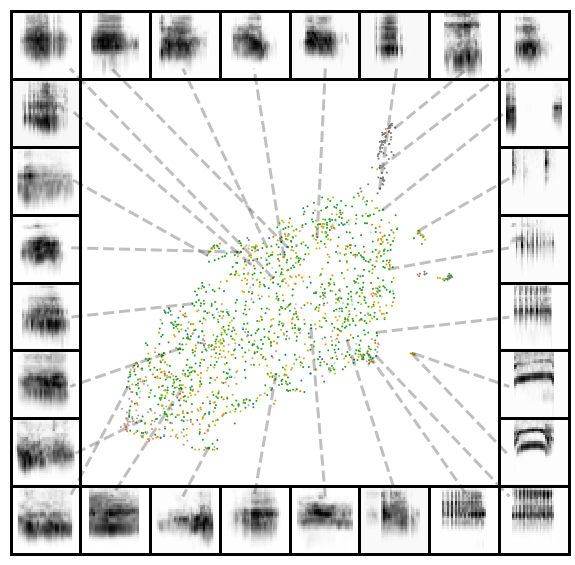

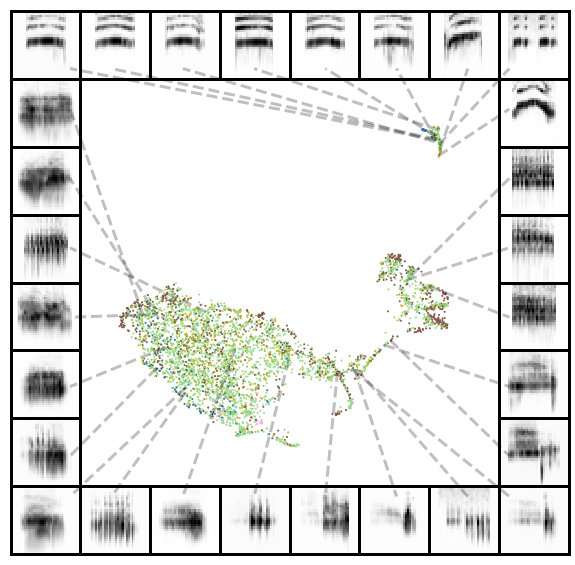

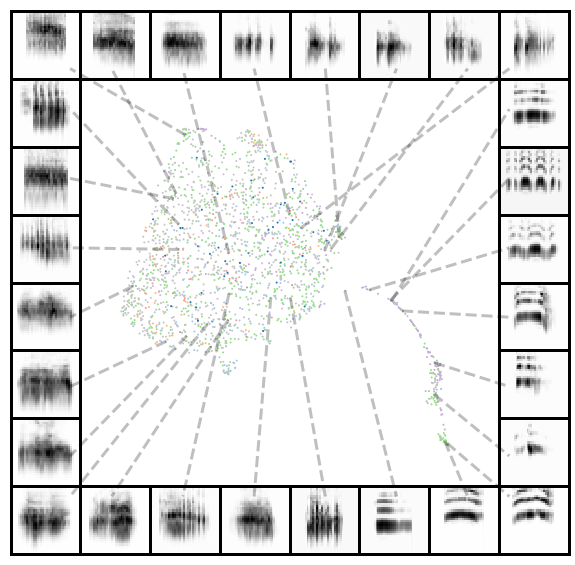

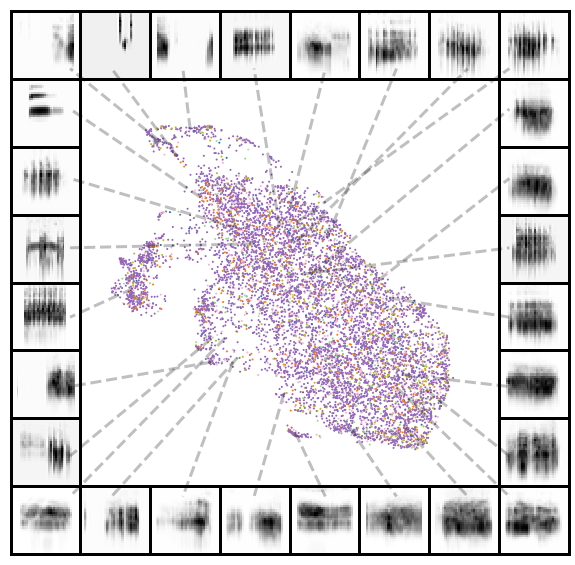

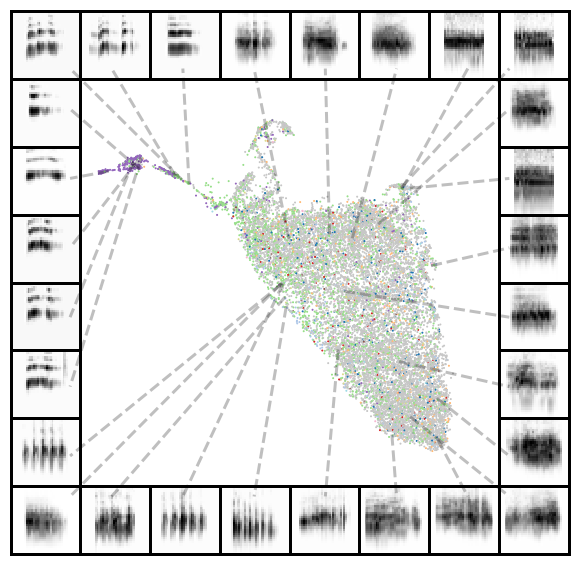

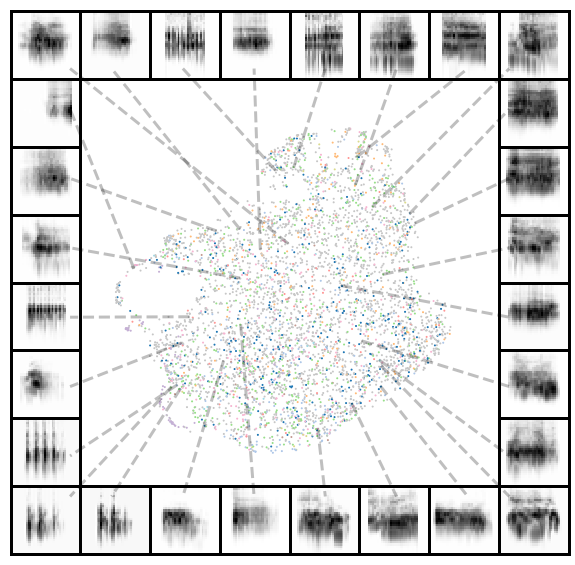

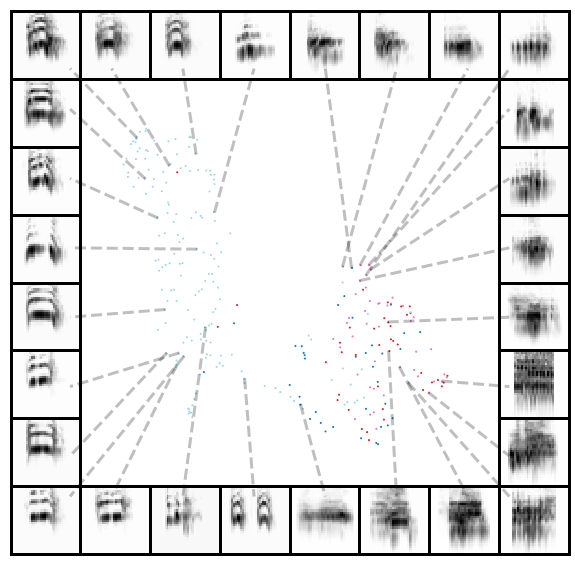

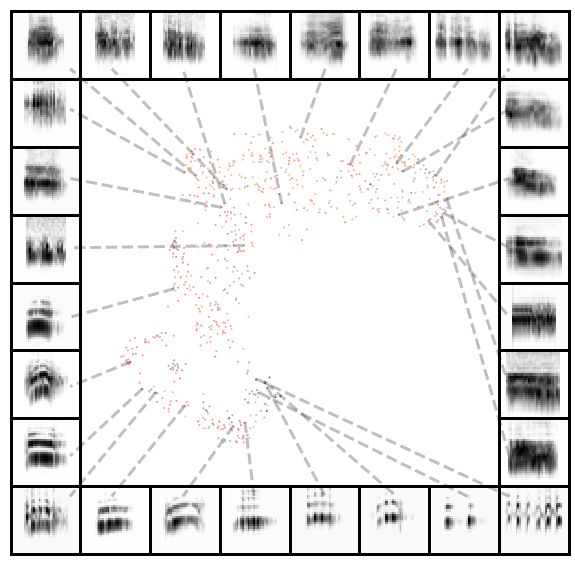

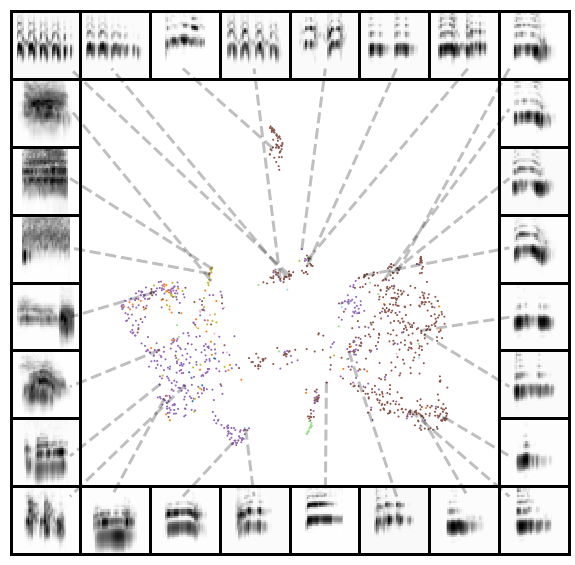

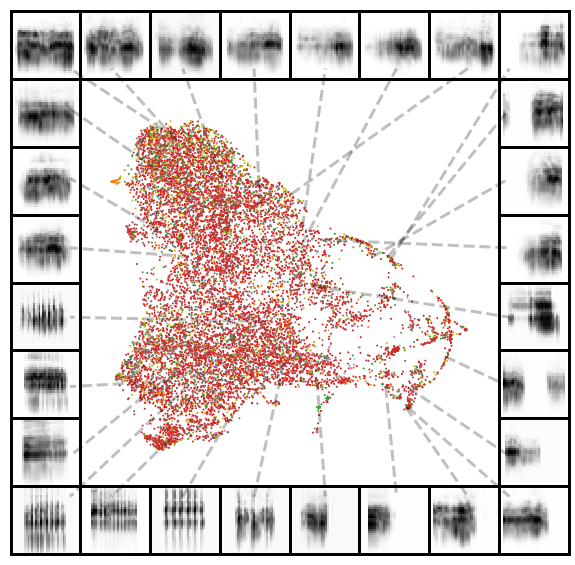

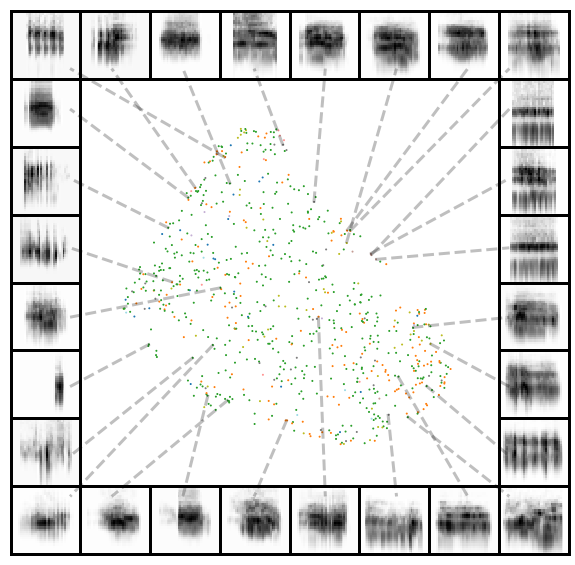

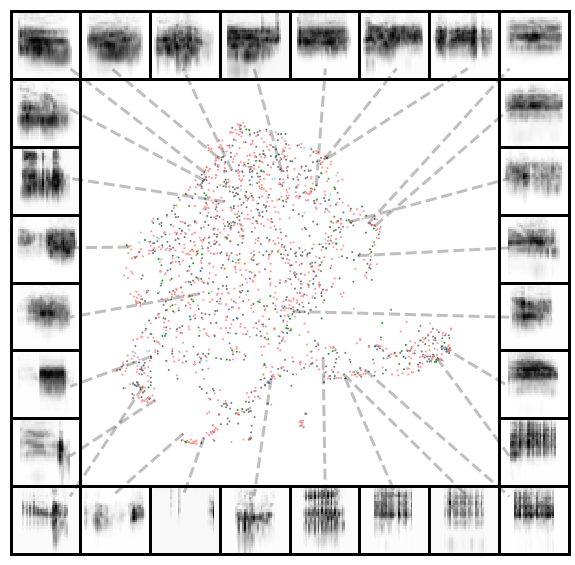

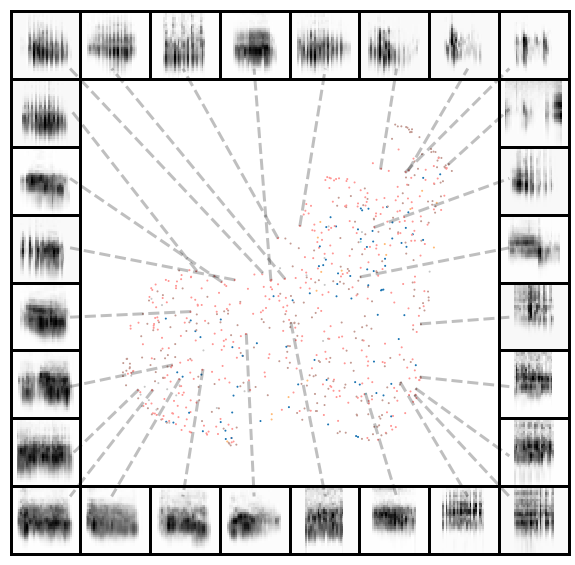

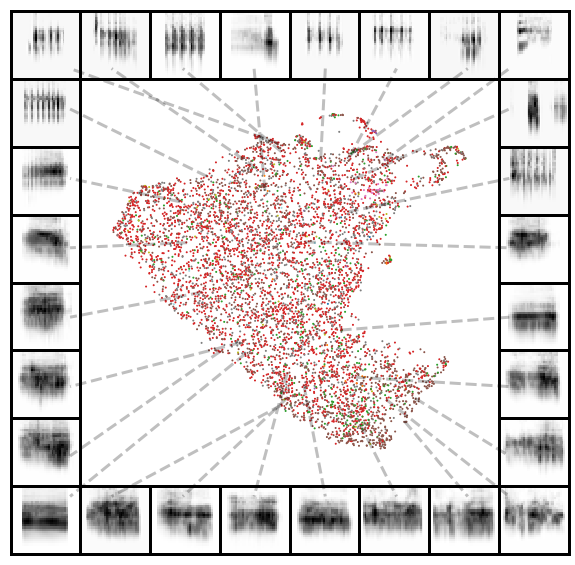

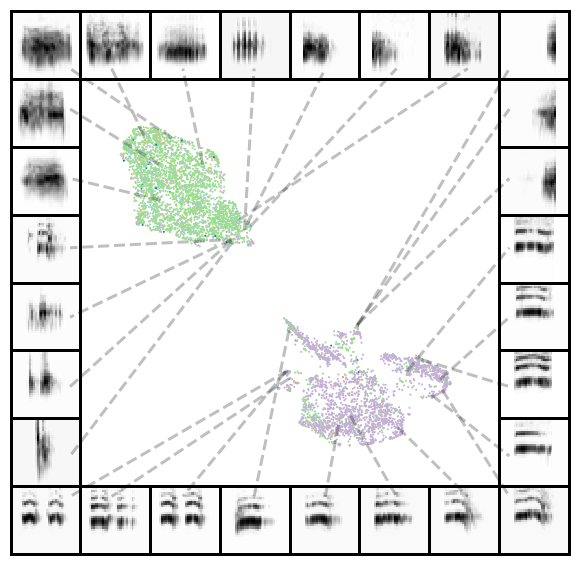

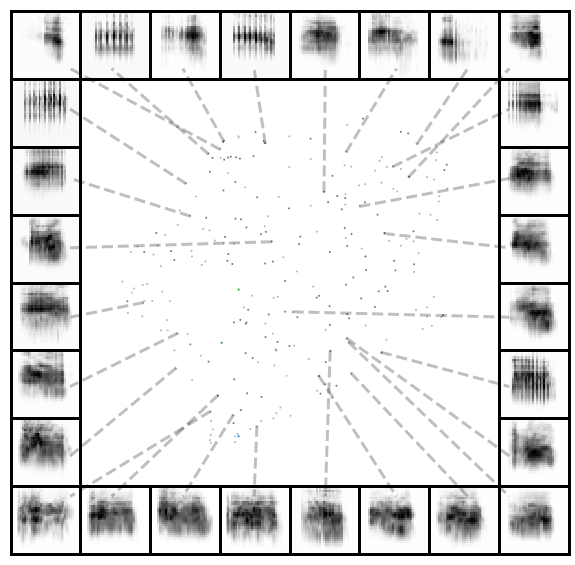

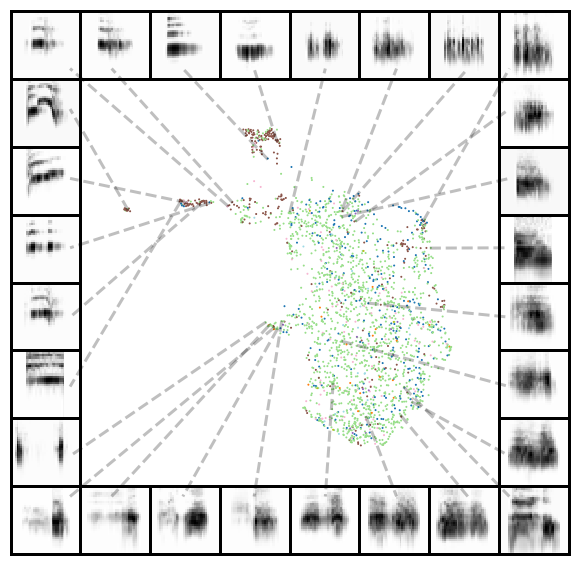

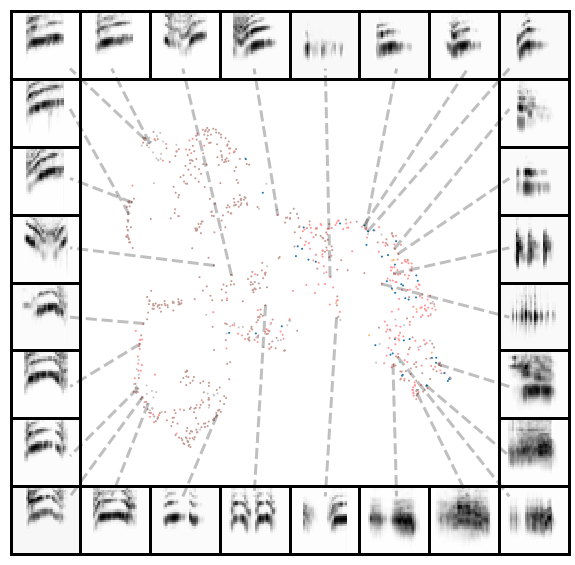

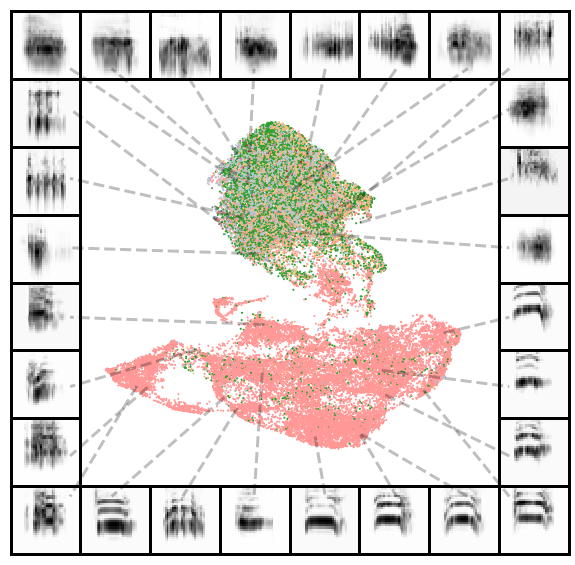

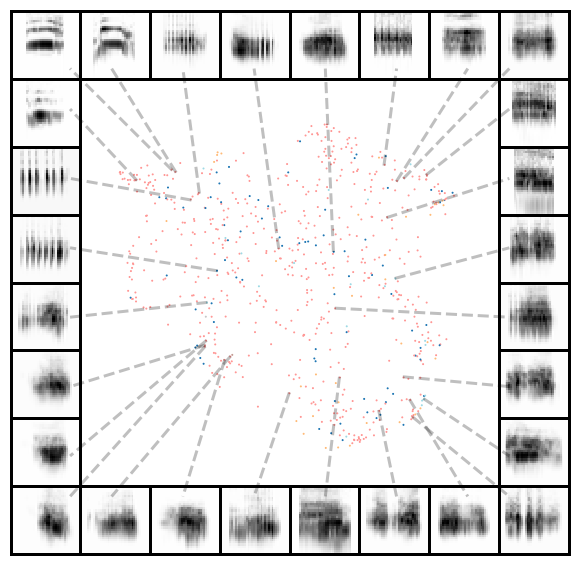

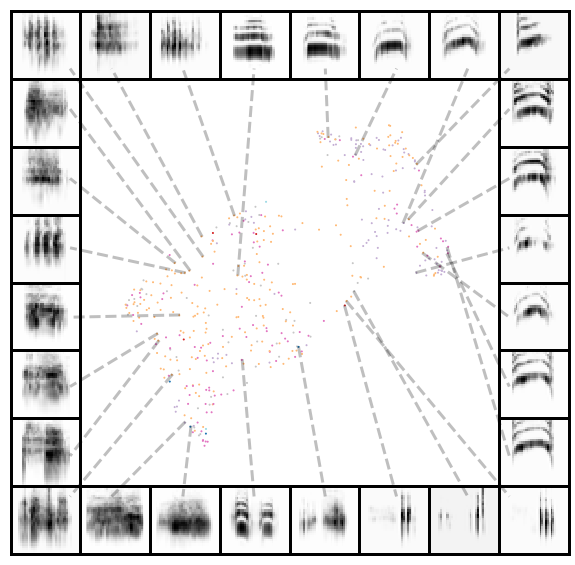

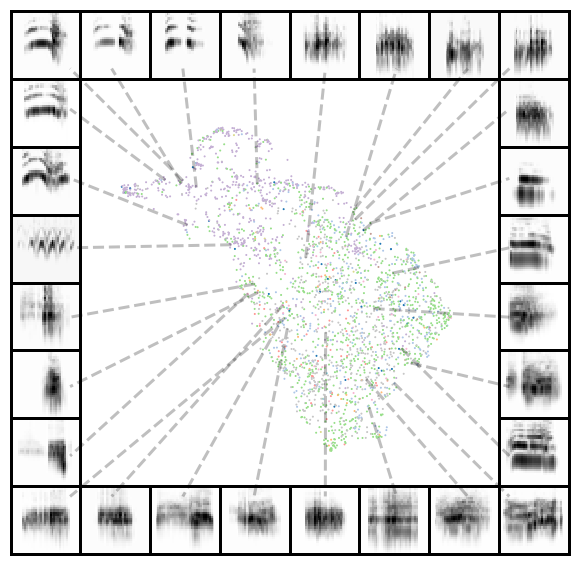

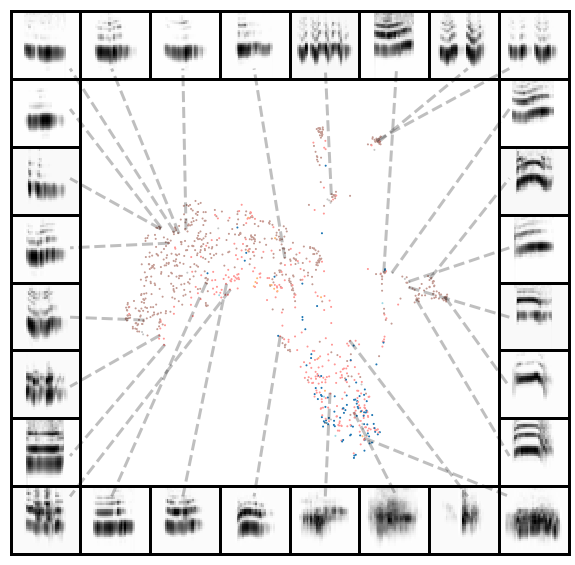

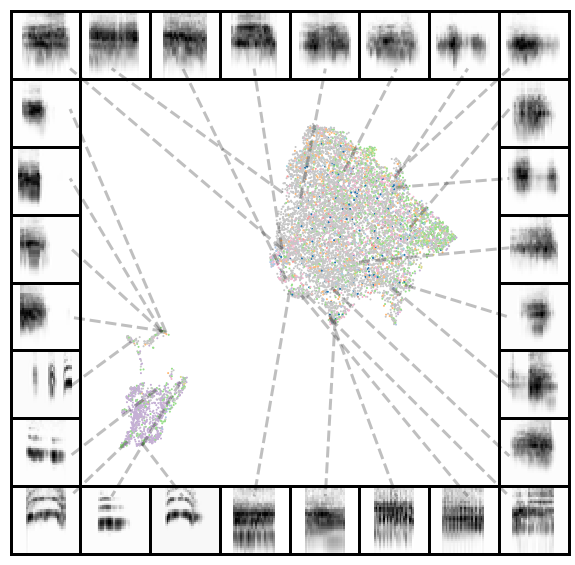

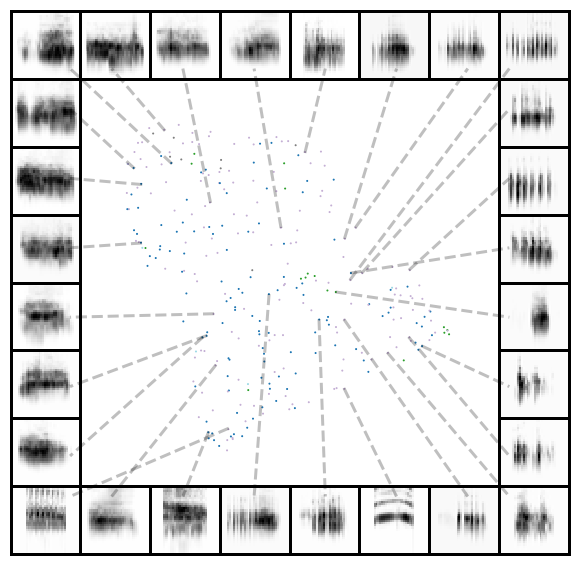

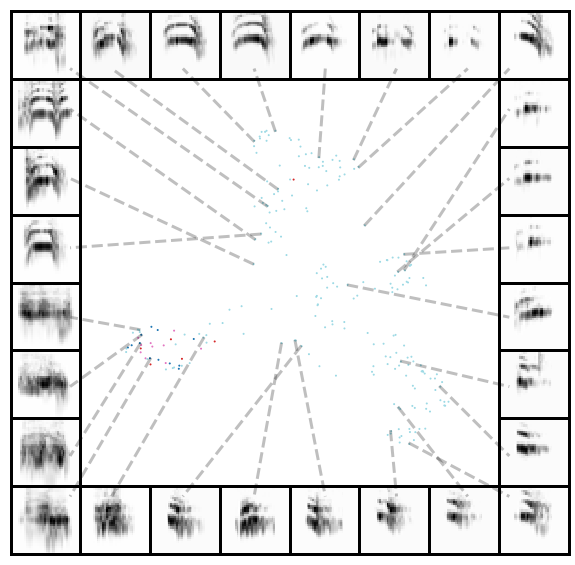

In [11]:
for idx, row in datasets.iterrows():
    syllable_df = pd.read_pickle(row['_loc'])
    embedding = np.vstack(syllable_df.umap.values)
    specs = list(syllable_df.spectrogram.values)
    scatter_spec(
        embedding,
        specs,
        column_size=8,
        #x_range = [-4.5,4],
        #y_range = [-4.5,5.5],
        pal_color="hls",
        color_points=False,
        enlarge_points=0,
        figsize=(10, 10),
        range_pad = 0.15,
        scatter_kwargs = {
            'labels': syllable_df.context.values,
            'alpha': 1,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,

    );
    plt.show()
    #save_fig(FIGURE_DIR / 'discrete_umap' / ds, dpi=300, save_jpg=True, save_png=True)
    #break